In [23]:
#imports

import pandas as pd
from datetime import datetime as dt
import numpy as np
import random
import matplotlib.pyplot as plot

#Create a dataframe from the dataset
df = pd.read_csv('U.S. Presidents Birth and Death Information - Sheet1.csv')

In [24]:
#Convert the date columns to conventional datetypes for operational ease
df['BIRTH DATE'] = pd.to_datetime(df['BIRTH DATE'])
df['DEATH DATE'] = pd.to_datetime(df['DEATH DATE'])

In [25]:
#Update place of death for presidents who are alive and well for further calculations
update_death_place = df.select_dtypes(exclude=['datetime'])
df[update_death_place.columns] = update_death_place.fillna('Living')

In [26]:
update_death_date = df.select_dtypes(include=['datetime'])
df[update_death_date.columns] = update_death_date.fillna(dt.now())
#Clean up data to remove some informational content (which cannot be used for any operations)
df = df.drop(df.index[-1])

In [27]:
#Conversions

df['lived_days'] = (df['DEATH DATE'] - df['BIRTH DATE']) / np.timedelta64(1, 'D')
df['lived_months'] = (df['DEATH DATE'] - df['BIRTH DATE']) / np.timedelta64(1, 'M')
df['lived_years'] = (df['DEATH DATE'] - df['BIRTH DATE']) / np.timedelta64(1, 'Y')

In [28]:
#Creating individual dataframes for Presidents ranked 1 to 10 based on age in ascending and descending orders
ascending_df = df.sort_values(by=['lived_days']).head(10)
descending_df = df.sort_values(by=['lived_days'], ascending=False).head(10)

In [29]:
ascending_df['DEATH DATE'] = pd.to_datetime(ascending_df['DEATH DATE']).dt.date
descending_df['DEATH DATE'] = pd.to_datetime(descending_df['DEATH DATE']).dt.date

In [30]:
# Grabbing required columns for calculation of statistical distributions
lived_days_column = df["lived_days"]
lived_years_column = df["lived_years"].astype(int)
year_frequency = lived_years_column.value_counts()

In [31]:
# Assigning random weights in [0, 1] for calculating weighted averages
weights = []
for year in range(len(lived_years_column)):
    weights.append(random.random())
weights = np.array(weights)
# Calculating weighted values
weighted_values = weights * lived_days_column

# Calculating the required distributions
mean = lived_days_column.mean()
weighted_mean = weighted_values.sum() / weights.sum()
median = lived_days_column.median()
mode = lived_days_column.mode()[0] #grabbing the first value for the Mode
max = lived_days_column.max()
min = lived_days_column.min()
std_dev = lived_days_column.std()

In [32]:
# Creating a new dataframe for our statistical data
data = [['mean', mean, mean/365], ['weighted_mean', weighted_mean, weighted_mean/365], ['median', median, median/365], ['mode', mode, mode/365], ['max', max, max/365], ['min', min, min/365], ['std_dev', std_dev, std_dev/365]]
stats_dataframe = pd.DataFrame(data, columns = ['Statistic', 'Value(days)', 'Value(years)'])
stats_dataframe['Value(days)'] = stats_dataframe['Value(days)'].astype(int)
stats_dataframe['Value(years)'] = stats_dataframe['Value(years)'].astype(float)

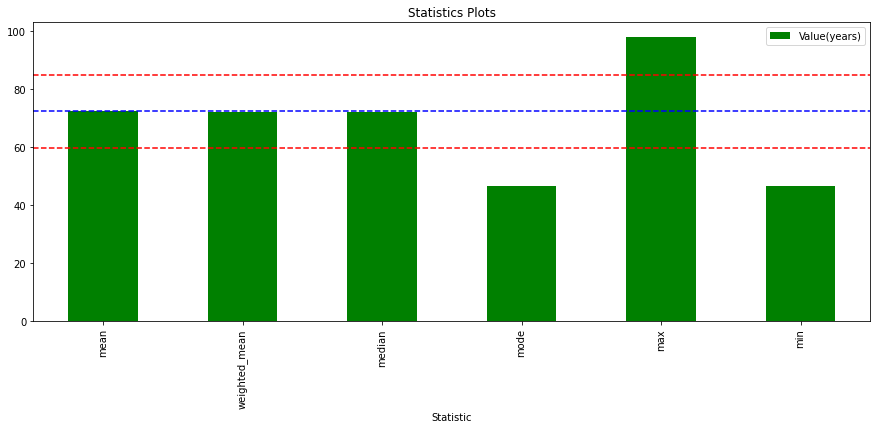

,Statistic,Value(days),Value(years)
0,mean,26409,72.354455
1,weighted_mean,26229,71.861838
2,median,26227,71.854795
3,mode,16978,46.515068
4,max,35762,97.980790
5,min,16978,46.515068
6,std_dev,4582,12.556000


In [37]:
#dropping index 6 from the statistics table because plotting the standard deviation alongside other metrics is not meaningful
stats_dataframe.drop([6]).plot(kind = 'bar', x = 'Statistic', y = 'Value(years)', color = 'green')
plot.title('Statistics Plots')

#plotting standard deviation to show the spread of data on either sides of the mean
plot.axhline(y = mean/365 + std_dev/365, color = 'red', linestyle = '--', label='Standard Deviation')
plot.axhline(y = mean/365, color = 'blue', linestyle = '--', label='Mean')
plot.axhline(y = mean/365 - std_dev/365, color = 'red', linestyle = '--')
plot.show()
stats_dataframe

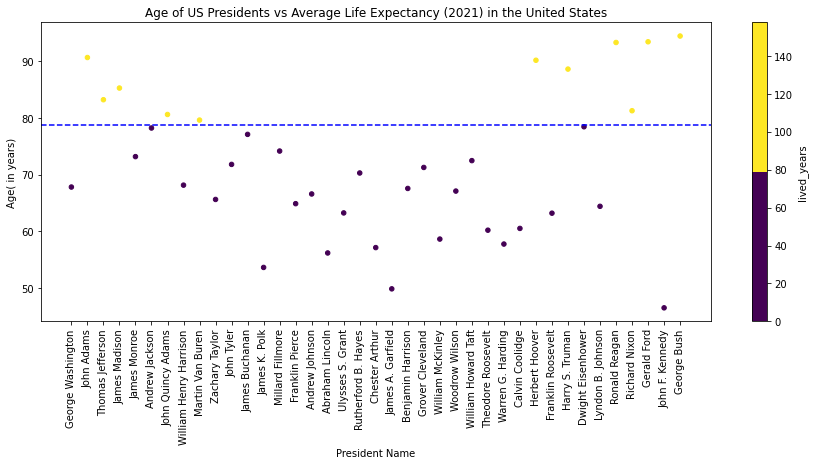

In [36]:
df = df.sort_values(by=['BIRTH DATE'])
df = df[df['LOCATION OF DEATH'] != 'Living']
# Current Average life expectancy in the US is 78.79 years. 
cmap=plot.get_cmap('viridis', 2)
df.plot(kind = 'scatter', x='PRESIDENT', y='lived_years', c= 'lived_years', cmap=cmap, vmin = 0, vmax = 78.79*2, sharex = False)
plot.axhline(y = 78.79, color = 'blue', linestyle = '--', label='Mean')
plot.rcParams["figure.figsize"] = (15,5.5)
plot.ylabel("Age( in years)")
plot.xlabel("President Name")
plot.title("Age of US Presidents vs Average Life Expectancy (2021) in the United States")
plot.xticks(rotation=90)
plot.show()